# Mandatory Assignment 01
## Natural Language Processing and Text Analytics (KAN-CDSCO1002U)

**Alex & Pontus**

---
## Part 1: Mandatory Question

The following two sentences are ambiguous -- that is, they each have two (or more) different readings. For each sentence, explain the different readings:

**1. The girl attacked the boy with the book.**

reading 1: the girl attacked the boy that had a book

reading 2: the girl attacked the boy using a book as a weapon

**2. We decided to leave on Saturday.**

reading 1: they are leaving on a saturday

reading 2: they took a decision on a saturday




Are the following sentences ambiguous? If the sentence is ambiguous, explain the different readings. If not, explain why not.

**3. I saw a man with a briefcase.**

ambiguous, either the man has the briefcase or the viewer has a briefcase

**4. I saw the planet with a telescope.**

ambiguous, either a planet was witnessed through a telescope, or a planet with a telescope was witnessed


the reason why 2, 3 and 4 are ambiguous are because you do not know which noun the preposition is connected to

Try the above sentences (3 and 4) in this parse tree generator: https://huggingface.co/spaces/nanom/syntactic_tree

Compare the dependency structures for both of them. Explain the differences in the link to the preposition "with" in 3 vs. 4.

I saw a man with a briefcase.

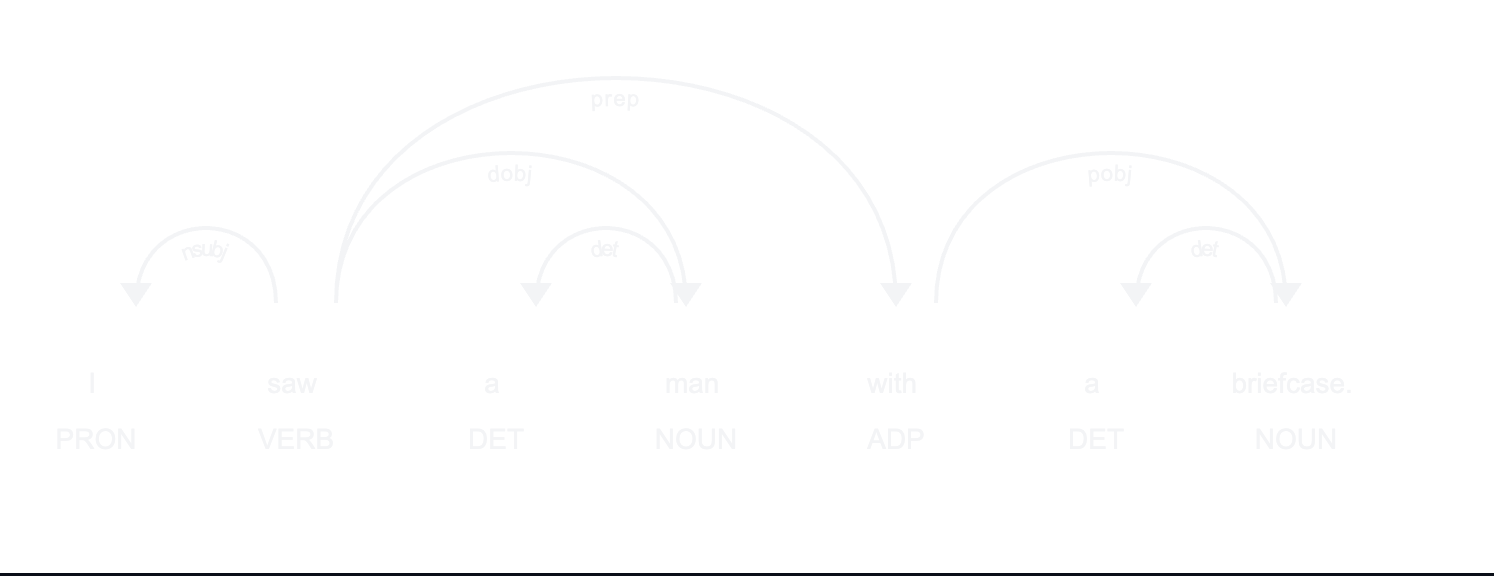

saw: (Root) (VBD)
├── I: 1 (PRP)
├── man: 1 (NN)
│   └── a: 2 (DT)
├── with: 1 (IN)
│   └── briefcase: 2 (NN)
│       └── a: 3 (DT)
└── .: 1 (.)

I saw the planet with a telescope.

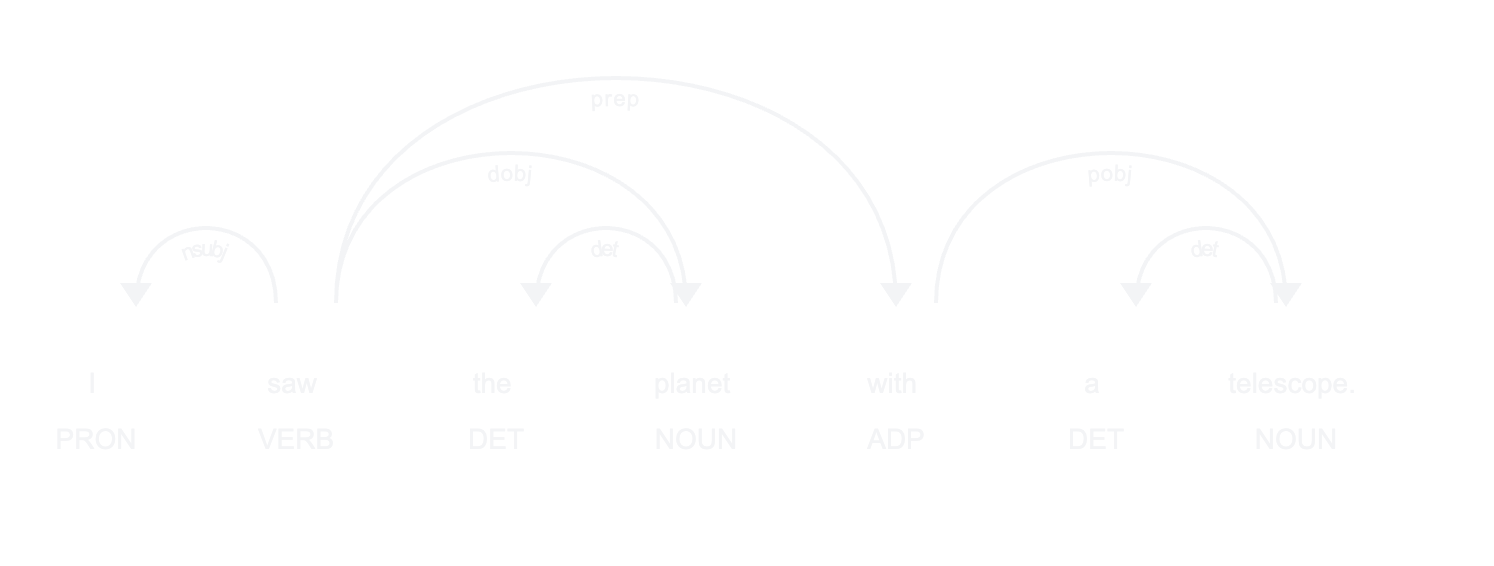

saw: (Root) (VBD)
├── I: 1 (PRP)
├── planet: 1 (NN)
│   └── the: 2 (DT)
├── with: 1 (IN)
│   └── telescope: 2 (NN)
│       └── a: 3 (DT)
└── .: 1 (.)


The ambiguity in all three sentences comes from prepositional phrase attachment: the preposition ("with" in sentences 3 and 4) can grammatically attach to more than one element in the sentence, and the syntax alone does not tell you which one is intended.


---
## Part 2: Select any one question to answer

*(Choose either Option A or Option B below)*

### Option A: Linguistic Analysis of a Text Corpus Using spaCy

There is an uploaded text corpus named `sample.xlsx`. Conduct a linguistic analysis using Part-of-Speech (POS) tagging and Named Entity Recognition (NER) in spaCy library only on the "SOS Tweet/SOS Message" column.

#### Task 1: Prepare the Corpus
Pre-process the corpus data by removing stopwords, removing extra spaces, converting all text to lowercase, or apply any other text normalization techniques that you think is relevant.

In [11]:
# Task 1: Prepare the Corpus
import pandas as pd
import spacy
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the dataset (headers are in row 8)
df = pd.read_excel("Data/sample.xlsx", header=8)

# Extract the SOS Tweet / SOS Message column
sos_col = "SOS Tweet / SOS Message"
messages = df[sos_col].dropna().astype(str).tolist()

print(f"Total messages: {len(messages)}")
print(f"Sample message:\n{messages[0][:200]}...")

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # Remove mentions like [Redacted Mention] and [Redacted Address]
    text = re.sub(r"\[redacted \w+\]", "", text)
    # Remove special characters and extra spaces, keep letters and basic punctuation
    text = re.sub(r"[^a-z0-9\s.,!?'-]", " ", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Add space before/after periods stuck to letters
    text = re.sub(r'\.(?=[a-z])', '. ', text)

    return text

# Apply preprocessing
df_clean = df.copy()
df_clean["cleaned_text"] = df[sos_col].dropna().astype(str).apply(preprocess)

# Remove stopwords using spaCy
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct and token.text.strip()])

df_clean["processed_text"] = df_clean["cleaned_text"].dropna().apply(remove_stopwords)

# Show results
print("\nPreprocessing complete.")
print(f"\nBefore: {messages[0][:150]}...")
print(f"\nAfter:  {df_clean['processed_text'].iloc[0][:150]}...")

Total messages: 100
Sample message:
my relative B************n who is from bagmara jharkhand is tested positive for corona and is admitted in recovery nourshing home bardmaan West Bengal.He is not getting sufficient treatment and his he...

Preprocessing complete.

Before: my relative B************n who is from bagmara jharkhand is tested positive for corona and is admitted in recovery nourshing home bardmaan West Bengal...

After:  relative b n bagmara jharkhand tested positive corona admitted recovery nourshing home bardmaan west bengal getting sufficient treatment health gettin...


#### Task 2: POS Tagging and NER
Apply POS tagging to the entire corpus to analyze the distribution of different parts of speech. Use NER to identify and categorize named entities within the text such as name, date, locations etc.

In [12]:
# Task 2: POS Tagging and NER
from collections import Counter

# Process all cleaned messages through spaCy
docs = list(nlp.pipe(df_clean["processed_text"].dropna().tolist()))

# --- POS Tagging ---
pos_counts = Counter()
for doc in docs:
    for token in doc:
        if token.text.strip():
            pos_counts[token.pos_] += 1

# Display POS distribution
pos_df = pd.DataFrame(pos_counts.most_common(), columns=["POS Tag", "Frequency"])
print("POS Tag Distribution:")
print(pos_df.to_string(index=False))

# --- Named Entity Recognition ---
ner_counts = Counter()
entity_examples = {}

for doc in docs:
    for ent in doc.ents:
        ner_counts[ent.label_] += 1
        if ent.label_ not in entity_examples:
            entity_examples[ent.label_] = []
        if len(entity_examples[ent.label_]) < 5:
            entity_examples[ent.label_].append(ent.text)

# Display NER distribution
print("\nNamed Entity Distribution:")
ner_df = pd.DataFrame(ner_counts.most_common(), columns=["Entity Type", "Frequency"])
print(ner_df.to_string(index=False))

# Show examples per entity type
print("\nExamples per entity type:")
for label, examples in entity_examples.items():
    print(f"  {label}: {examples}")

POS Tag Distribution:
POS Tag  Frequency
   NOUN        792
  PROPN        488
    NUM        329
   VERB        221
    ADJ        136
    ADV         37
   INTJ         18
   PART         18
    ADP         14
    AUX          7
      X          6
  CCONJ          2
    DET          1
    SYM          1
   PRON          1
  PUNCT          1

Named Entity Distribution:
Entity Type  Frequency
   CARDINAL        143
       DATE         60
     PERSON         29
        ORG         24
   QUANTITY          8
        GPE          8
       TIME          1

Examples per entity type:
  CARDINAL: ['70 80', '8 3', '62', '9', '9 6']
  ORG: ['sos', 'insta thedesinazaakat', 'kota oxygen', 'metabolic acidosis h o ckd creatinine', 'attendee s']
  DATE: ['age 62', '56', 'age 35yr', 'age 80', '9 8']
  QUANTITY: ['10 litres oxygen', '9 1', 'weight-50 kg ct', '9 1 address- lakhmapur jaunpur', "56 dm'ed"]
  PERSON: ['spo2', 'spo2', 'covid covid19', 'cylinder aligarh', 'spo2']
  GPE: ['new delhi', 'ncr', 

#### Task 3: Analysis
Determine the most common POS tags and discuss what this reveals about the structure of the text.

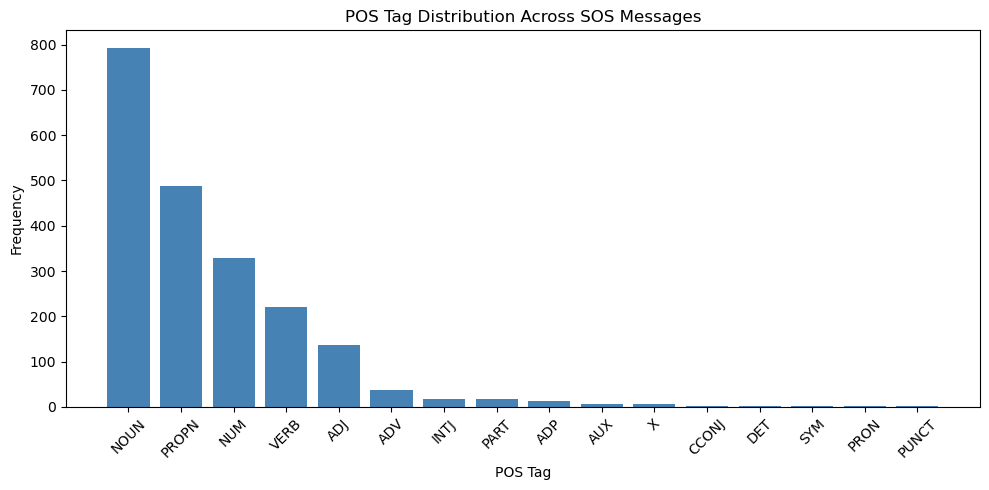


Top 10 NOUN words:
  oxygen: 81
  bed: 48
  contact: 38
  level: 38
  age: 28
  help: 28
  patient: 21
  ventilator: 19
  icu: 16
  location: 12

Top 10 PROPN words:
  delhi: 22
  patient: 20
  urgent: 18
  spo2: 18
  icu: 17
  r: 11
  sir: 11
  cylinder: 10
  bed: 9
  o2: 9

Top 10 NUM words:
  9: 55
  8: 17
  7: 16
  1: 16
  80: 15
  3: 11
  4: 11
  25: 11
  2: 11
  5: 9


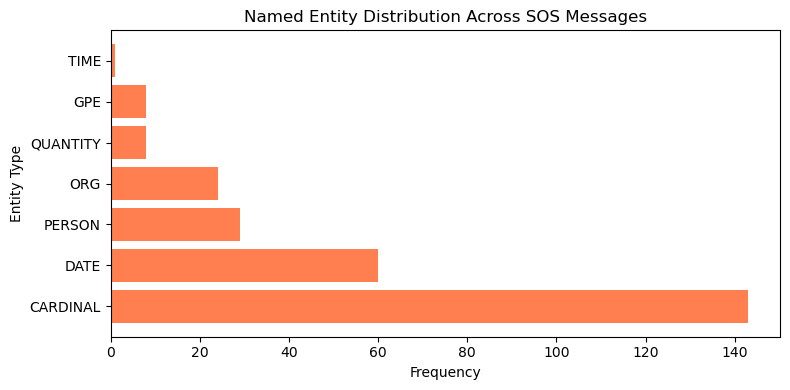

In [13]:
# Task 3: Analysis of POS Tag Distribution

import matplotlib.pyplot as plt

# --- Visualize POS distribution ---
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(pos_df["POS Tag"], pos_df["Frequency"], color="steelblue")
ax.set_title("POS Tag Distribution Across SOS Messages")
ax.set_xlabel("POS Tag")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Top words for the 3 most common POS tags ---
# This helps us understand *what* nouns, proper nouns, and numbers appear
top_pos_tags = ["NOUN", "PROPN", "NUM"]

for tag in top_pos_tags:
    words_with_tag = []
    for doc in docs:
        for token in doc:
            if token.pos_ == tag and token.text.strip():
                words_with_tag.append(token.text)
    word_freq = Counter(words_with_tag).most_common(10)
    print(f"\nTop 10 {tag} words:")
    for word, count in word_freq:
        print(f"  {word}: {count}")

# --- NER: visualize entity type distribution ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(ner_df["Entity Type"], ner_df["Frequency"], color="coral")
ax.set_title("Named Entity Distribution Across SOS Messages")
ax.set_xlabel("Frequency")
ax.set_ylabel("Entity Type")
plt.tight_layout()
plt.show()

#### Task 4: Short Report

### Linguistic Analysis of COVID-19 SOS Messages

We analyzed 100 SOS messages from the COVID-19 crisis in India using spaCy's POS tagging and NER. The messages are urgent requests for medical help — things like oxygen, hospital beds, and ventilators.

**Preprocessing**

We lowercased everything, removed URLs, redacted placeholders, special characters, and stopwords. This stripped the text down to the most meaningful words before running the analysis.

**What POS tagging showed us**

The three most common POS tags were NOUN (792), PROPN (488), and NUM (329). This makes sense given what the messages are about:

| POS Tag | Frequency |
|---------|-----------|
| NOUN    | 792       |
| PROPN   | 488       |
| NUM     | 329       |

- **Nouns** — the top nouns are words like *oxygen* (81), *bed* (48), *contact* (38), and *ventilator* (19). Basically the resources people are asking for.
- **Proper nouns** — includes city names like *delhi* (22), but also words like *patient* (20) and *spo2* (18) that probably shouldn't be proper nouns. We think spaCy tagged them as PROPN because we lowercased everything, so it lost the capitalization cues it normally uses.
- **Numbers** — show up a lot because the messages include oxygen levels, ages, phone numbers, and dosages.

We also noticed there are very few adjectives, adverbs, or function words. That's partly because we removed stopwords, but also because SOS messages are just short and to the point — people skip filler words when they need help fast.

**What NER showed us**

NER found 273 entities across 7 types. CARDINAL was by far the most common (143), followed by DATE (60) and PERSON (29).

The NER results were a bit messy though. We noticed a few things:

- **GPE (locations)** only found 8 entities, even though almost every message mentions a location. Locations like city names probably got missed because we lowercased everything — spaCy uses capitalization to spot place names, and after lowercasing, "delhi" just looks like a regular word.
- **"spo2"** kept getting tagged as PERSON, which is obviously wrong — it's a medical abbreviation for oxygen saturation.
- **Ages like "age 62"** were tagged as DATE, which isn't really right either.
- **Medical terms** got tagged as ORG in some cases (e.g., "kota oxygen").

So basically, our preprocessing helped with counting word frequencies, but it seems to have made NER worse. Lowercasing removed capitalization and stopword removal broke up the sentence structure, and spaCy's NER model relies on both of those to make good predictions. If we wanted better NER results, we'd probably need to run it on the original text before cleaning it up so much.